# Quantum Fourier Transform

For a basis vector $\ket{j}$ the Quantum Fourier Transform represents the following transformation:
$$\begin{align}
\ket{j} \rightarrow \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi ijk/N} = \frac{(\ket{0}+e^{2\pi i0.j_n}\ket{1})(\ket{0}+e^{2\pi i0.j_nj_{n-1}}\ket{1})...(\ket{0}+e^{2\pi i0.j_nj_{n-1}..j_0}\ket{1})}{2^{n/2}}
\end{align}$$


Consider the following gate:
$$\begin{align}
R_k = R_z(e^{2\pi i/2^{k}}) = \left(\begin{array}{cc} 
1 & 0\\
0 & e^{2\pi i/2^k} \\
\end{array}\right)
\end{align}$$

Controlled Operation of this gate can be used to implement the QFT

In [15]:
from qiskit import QuantumCircuit
from qiskit.quantum_info.operators import Operator
from qiskit.quantum_info import Statevector
import numpy as np

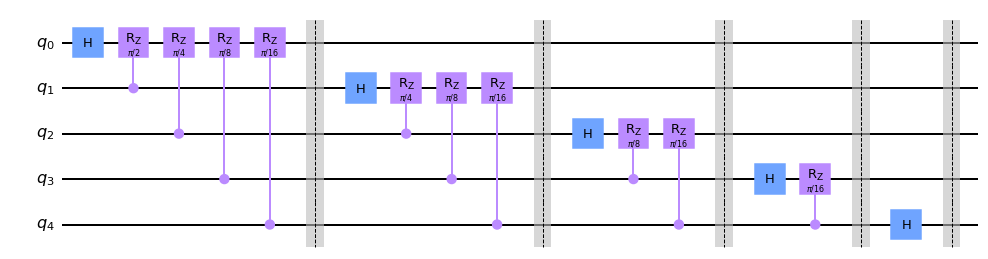

In [44]:
def quantumFourierTransform(num_qubits):
    qft = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qft.h(i)
        for j in range(i+1, num_qubits):
            qft.crz(np.pi/(2**(j)), j, i)
        qft.barrier()
    return qft

qft5 = quantumFourierTransform(5)
qft5.draw("mpl")

Let's compare it against the quantum fourier transform in qiskit

In [37]:
from qiskit.circuit.library import QFT

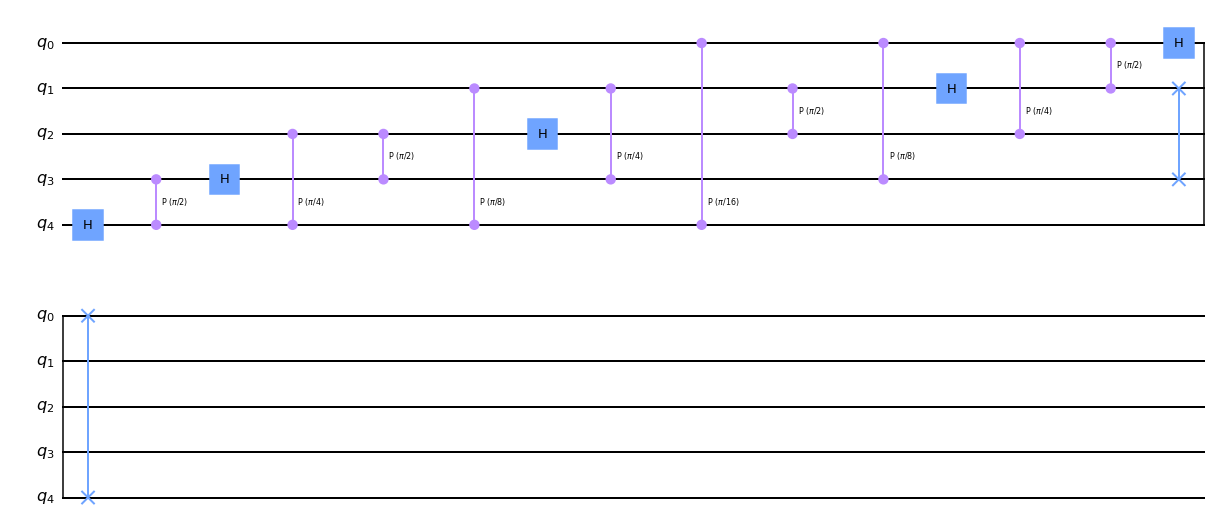

In [45]:
def qiskitQuantumFourierTransform(num_qubits):
    return QFT(num_qubits)

qft5 = qiskitQuantumFourierTransform(5)
qft5.decompose().draw("mpl")

We see essentially the same circuit